In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdChemReactions

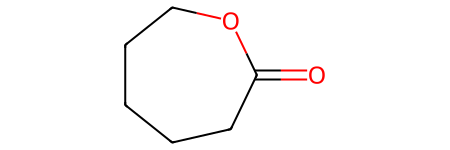

In [4]:
rop_smiles = "C1CCC(=O)OCC1"
dp0 = Chem.MolFromSmiles(rop_smiles)
dp0

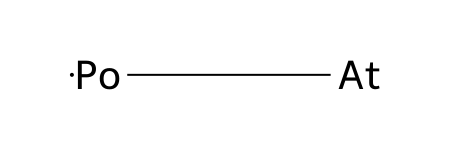

In [5]:
helper = Chem.MolFromSmiles("[Po]-[At]")
helper

### Initiation (vinyl)

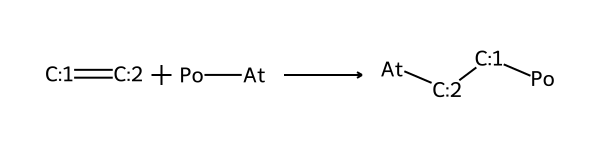

In [ ]:
initiation = rdChemReactions.ReactionFromSmarts(
    "[O:1]=[C:2]-[O:3].[Po]-[At]>>[Po]-[C:2]-[O:3]-[At]"
)
initiation

[09:46:53] reactant 1 has no mapped atoms.


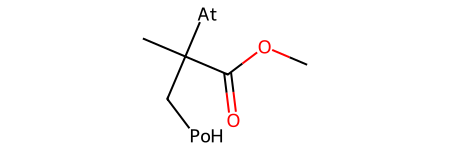

In [159]:
# first step (dp 0 to dp 1)
dp1 = initiation.RunReactants((dp0, helper))[1][0]
dp1

### Propagation reaction (should work for everything)

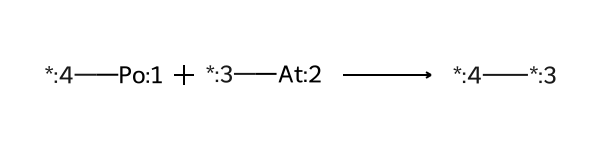

In [160]:
prop = rdChemReactions.ReactionFromSmarts(
    "[*:4]-[Po:1].[At:2]-[*:3]>>[*:4]-[*:3]"
)
prop

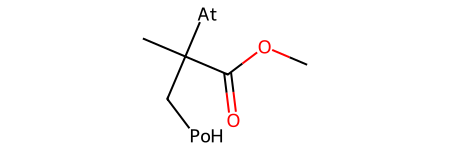

In [161]:
dp1

In [162]:
products = [item[0] for item in prop.RunReactants((dp1, dp1))]
products

[09:46:53] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


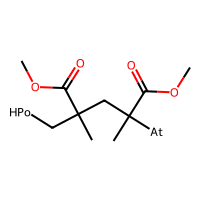

In [163]:
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(products, molsPerRow=1)

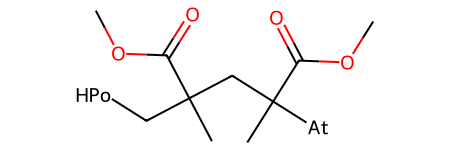

In [164]:
dp2 = products[0]
dp2

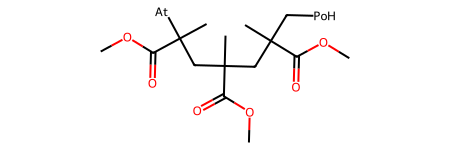

In [165]:
dp3 = prop.RunReactants((dp1, dp2))[0][0]
dp3

### Replace end groups with CH3s

In [166]:
replaceAt = rdChemReactions.ReactionFromSmarts(
    "[At:1]>>[C:1]"
)
replacePo = rdChemReactions.ReactionFromSmarts(
    "[Po:1]>>[C:1]"
)

In [167]:
replaceAt.RunReactantInPlace(dp3)

True

In [168]:
replacePo.RunReactantInPlace(dp3)

True

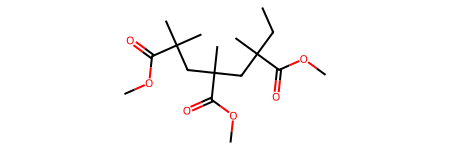

In [169]:
dp3